PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

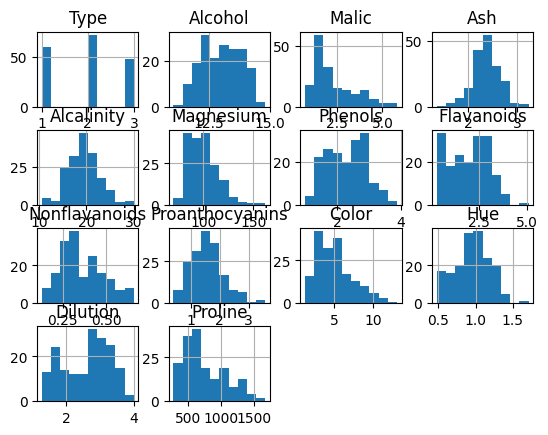

In [ ]:
df.hist()

<Axes: >

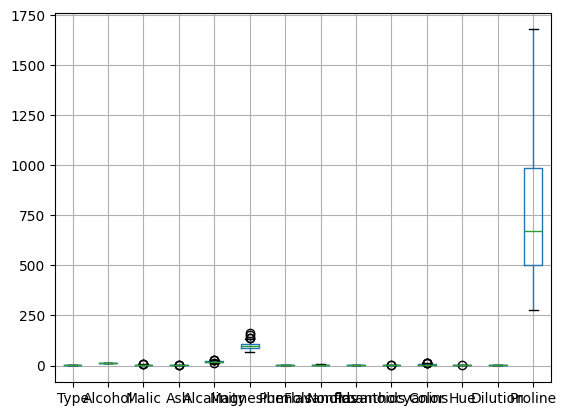

In [ ]:
df.boxplot()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

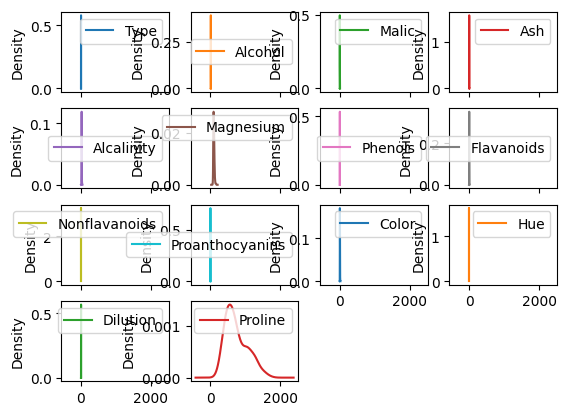

In [11]:
df.plot(kind='density',subplots=True,layout=(4,4))

In [12]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [14]:
#standardizing the dataset using StandardScaler
ss=StandardScaler()
df_ss=ss.fit_transform(df)
df_ss

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
#determining the optimal number of standard scaler
pca=PCA()
pca.fit(df_ss)

PCA()

Text(0, 0.5, 'Cummulative Explaned variance')

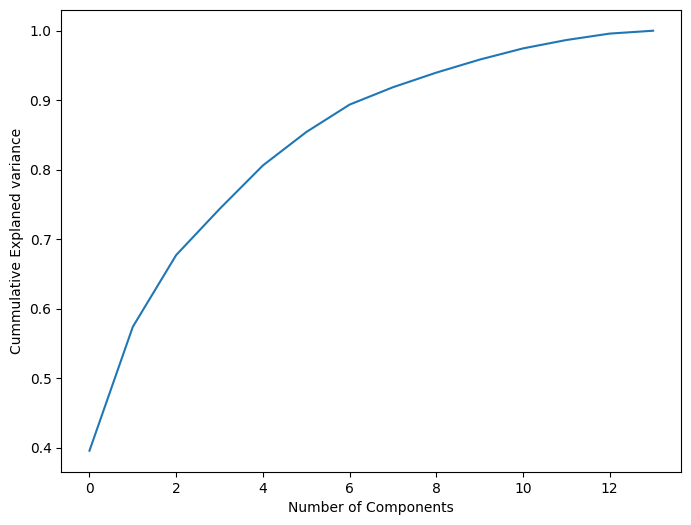

In [19]:
#scree plot
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explaned variance')


In [24]:

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_ss)
df_pca[:10]

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417]])

3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [26]:
#applying a clustering algorithm Kmeans to the original dataset
kmeans=KMeans(n_clusters=3, random_state=42)
k_pred=kmeans.fit_predict(df_ss)

In [27]:
silhouette_score(df_ss,k_pred)

0.30648398324833453

Text(0.5, 1.0, 'K-Means Clustering with original dataset')

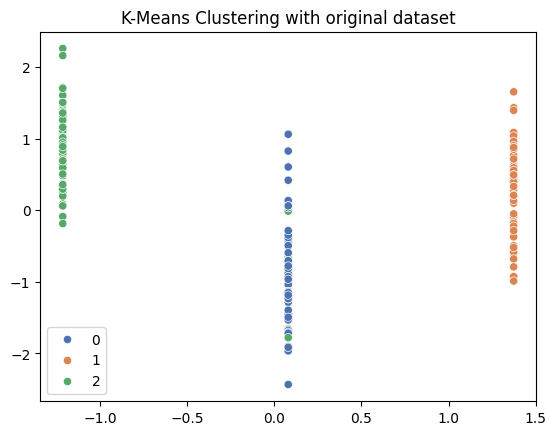

In [31]:
sns.scatterplot(x=df_ss[:,0],y=df_ss[:,1],hue=k_pred,palette='deep')
plt.title('K-Means Clustering with original dataset')

**Task 4: Clustering with PCA Data:**
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.**bold text**

In [35]:
#Applying the Kmean algorithm on the pca dataset
kmean=KMeans(n_clusters=3,random_state=42)
pca_pred=kmean.fit_predict(df_pca)

In [36]:
silhouette_score(df_pca,pca_pred)

0.6024415520362845

Text(0.5, 1.0, 'K-Means Clustering with PCA dataset')

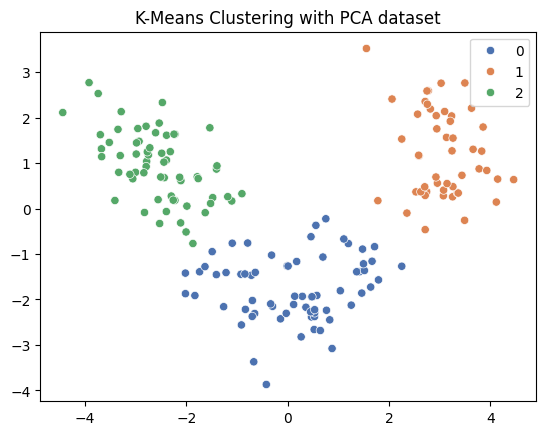

In [37]:
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=pca_pred,palette='deep')
plt.title('K-Means Clustering with PCA dataset')

**Task 5: Comparison and Analysis:**
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [38]:
print("silhouette_score of original dataset ",silhouette_score(df_ss,k_pred))
print("silhouette_score of pca dataset ",silhouette_score(df_pca,pca_pred))

silhouette_score of original dataset  0.30648398324833453
silhouette_score of pca dataset  0.6024415520362845


In [40]:
db_score_original_dataset=davies_bouldin_score(df_ss,k_pred)
db_score_pca_dataset=davies_bouldin_score(df_pca,pca_pred)

print("davies_bouldin_score of original dataset ",db_score_original_dataset)
print("davies_bouldin_score of pca dataset ",db_score_pca_dataset)

davies_bouldin_score of original dataset  1.315707552261773
davies_bouldin_score of pca dataset  0.5397078562575713


In [45]:

compare= np.c_[k_pred, pca_pred]
df_compare=pd.DataFrame(comparison, columns=["Original Data Labels", "PCA Data Labels"])
df_compare

,Original Data Labels,PCA Data Labels
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
173,1,1
174,1,1
175,1,1
176,1,1


In [48]:

print("Original Data Cluster Centers:")
print(kmeans.fit(df_ss).cluster_centers_)
print('\n')
print("PCA Data Cluster Centers:")
print(kmeans.fit(df_pca).cluster_centers_)

Original Data Cluster Centers:
[[ 7.99603601e-02 -9.09328403e-01 -3.80707476e-01 -5.19747426e-01
   1.37767008e-01 -4.97451451e-01 -9.62003532e-02 -7.65223671e-04
  -4.11471063e-03  1.12388425e-02 -8.81229129e-01  4.32636626e-01
   2.30777949e-01 -7.63273163e-01]
 [ 1.34745816e+00  1.86543138e-01  9.04971453e-01  2.49210264e-01
   5.83703484e-01 -5.06353947e-02 -9.88556997e-01 -1.23619475e+00
   7.16841717e-01 -7.49607560e-01  9.88498285e-01 -1.19129878e+00
  -1.30153966e+00 -3.80044610e-01]
 [-1.15133539e+00  8.35232085e-01 -3.03809683e-01  3.64706042e-01
  -6.10191294e-01  5.77586799e-01  8.85237363e-01  9.77819557e-01
  -5.62089654e-01  5.80286581e-01  1.71063479e-01  4.73983650e-01
   7.79247107e-01  1.12518529e+00]]


PCA Data Cluster Centers:
[[ 0.12171142 -1.75036892]
 [ 3.05866503  1.20826261]
 [-2.5488589   0.93661048]]


Task 6: Conclusion and Insight                                                



1.	Summarize the key findings and insights from the assignment.


a With the help of pca dimensionality of the dataset can be reduced which helps to simplify the datasets



b Improves the quality of the dataset






2.	Discuss the practical implications of using PCA and clustering in data analysis.



a  PCA is primarily used for dimensionality reduction while preserving the maximum variance in the data. Its practical implications include


b  By reducing the number of dimensions, PCA simplifies complex datasets, making them easier to visualize and analyze


c Reduces overfitting by eliminating redundant and noisy features, leading to more robust machine learning models







3.	Provide recommendations for when to use each technique based on the analysis conducted.




a Use PCA when the focus is on dimensionality reduction and preprocessing.


b Use Clustering when the focus is on discovering patterns or grouping data.


c Use both techniques together when clustering high-dimensional data for better accuracy and interpretability.